In [1]:
import pandas as pd
import numpy as np
import shapely
from shapely.geometry import shape, mapping
import geopandas as gpd
from geopandas.tools import sjoin
import requests 
import json
import matplotlib.pyplot as plt

/Users/gil/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
tracts2014 = pd.read_csv('Tract2014.csv')
tracts2018 = pd.read_csv('Tract2018.csv')

In [3]:
proct14 = tracts2014[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino']]

In [4]:
proct18 = tracts2018[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino']]

In [5]:
proct18

,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino
0,101.00,2960,103,0,57,10,36
1,102.06,3481,12,0,0,0,12
2,102.08,1254,11,11,0,0,0
3,103.04,2431,18,0,0,9,9
4,103.06,2462,21,0,0,0,21
...,...,...,...,...,...,...,...
1473,7601.00,3431,0,0,0,0,0
1474,7611.00,5210,67,0,0,0,67
1475,7612.00,5359,479,206,14,0,259
1476,7613.00,3370,422,6,206,67,143


In [6]:
proct14 = proct14.rename(columns = {'Geographic Area Name':'Tract','Estimate!!SEX AND AGE!!Total population':'Total Population 2014','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'LatinX Population 2014','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican':'Mexican 2014','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican':'Puerto Rican 2014','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban':'Cuban 2014','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino':'Other LatinX 2014'})
proct18 = proct18.rename(columns = {'Geographic Area Name':'Tract','Estimate!!SEX AND AGE!!Total population':'Total Population 2018','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'LatinX Population 2018','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican':'Mexican 2018','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican':'Puerto Rican 2018','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban':'Cuban 2018','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino':'Other LatinX 2018'})

In [7]:
proct14['Tract'] = proct14['Tract'].astype(str)
proct18['Tract'] = proct18['Tract'].astype(str)

In [8]:
proct18

,Tract,Total Population 2018,LatinX Population 2018,Mexican 2018,Puerto Rican 2018,Cuban 2018,Other LatinX 2018
0,101.0,2960,103,0,57,10,36
1,102.06,3481,12,0,0,0,12
2,102.08,1254,11,11,0,0,0
3,103.04,2431,18,0,0,9,9
4,103.06,2462,21,0,0,0,21
...,...,...,...,...,...,...,...
1473,7601.0,3431,0,0,0,0,0
1474,7611.0,5210,67,0,0,0,67
1475,7612.0,5359,479,206,14,0,259
1476,7613.0,3370,422,6,206,67,143


In [9]:
merged = pd.merge(proct14,proct18, how = "left", left_on = ['Tract'],right_on =['Tract'])

In [10]:
points = merged.copy()

In [11]:
points

,Tract,Total Population 2014,LatinX Population 2014,Mexican 2014,Puerto Rican 2014,Cuban 2014,Other LatinX 2014,Total Population 2018,LatinX Population 2018,Mexican 2018,Puerto Rican 2018,Cuban 2018,Other LatinX 2018
0,101.0,2959,150,0,117,0,33,2960,103,0,57,10,36
1,102.06,3011,3,1,1,0,1,3481,12,0,0,0,12
2,102.08,1738,28,0,0,0,28,1254,11,11,0,0,0
3,103.04,1995,10,7,0,0,3,2431,18,0,0,9,9
4,103.06,2937,94,0,3,0,91,2462,21,0,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,7601.0,3396,1,0,1,0,0,3431,0,0,0,0,0
1498,7611.0,5153,42,0,42,0,0,5210,67,0,0,0,67
1499,7612.0,5664,906,0,194,0,712,5359,479,206,14,0,259
1500,7613.0,3334,216,12,164,12,28,3370,422,6,206,67,143


In [12]:
points['% Point Change in LatinX Pop.'] = (points['LatinX Population 2018']/points['Total Population 2018'])-(points['LatinX Population 2014']/points['Total Population 2014'])

In [13]:
points['% Point Change in Total Pop.'] = (points['Total Population 2018']-points['Total Population 2014'])/points['Total Population 2014']

In [14]:
points['% Point Puerto Rican Change'] = (points['Puerto Rican 2018']/points['Total Population 2018'])-(points['Puerto Rican 2014']/points['Total Population 2014'])

In [15]:
points['% Point Mexican Change'] = (points['Mexican 2018']/points['Total Population 2018'])-(points['Mexican 2014']/points['Total Population 2014'])

In [16]:
points['% Point Cuban Change'] = (points['Cuban 2018']/points['Total Population 2018'])-(points['Cuban 2014']/points['Total Population 2014'])

In [17]:
points['% Point Other LatinX Change'] = (points['Other LatinX 2018']/points['Total Population 2018'])-(points['Other LatinX 2014']/points['Total Population 2014'])

In [18]:
points = points[['Tract','% Point Change in LatinX Pop.','% Point Change in Total Pop.','% Point Puerto Rican Change','% Point Mexican Change','% Point Cuban Change','% Point Other LatinX Change','Total Population 2014', 'LatinX Population 2014','Mexican 2014', 'Puerto Rican 2014', 'Cuban 2014', 'Other LatinX 2014','Total Population 2018', 'LatinX Population 2018', 'Mexican 2018','Puerto Rican 2018', 'Cuban 2018', 'Other LatinX 2018']]

In [19]:
points

,Tract,% Point Change in LatinX Pop.,% Point Change in Total Pop.,% Point Puerto Rican Change,% Point Mexican Change,% Point Cuban Change,% Point Other LatinX Change,Total Population 2014,LatinX Population 2014,Mexican 2014,Puerto Rican 2014,Cuban 2014,Other LatinX 2014,Total Population 2018,LatinX Population 2018,Mexican 2018,Puerto Rican 2018,Cuban 2018,Other LatinX 2018
0,101.0,-0.015896,0.000338,-0.020284,0.000000,0.003378,0.001010,2959,150,0,117,0,33,2960,103,0,57,10,36
1,102.06,0.002451,0.156094,-0.000332,-0.000332,0.000000,0.003115,3011,3,1,1,0,1,3481,12,0,0,0,12
2,102.08,-0.007339,-0.278481,0.000000,0.008772,0.000000,-0.016110,1738,28,0,0,0,28,1254,11,11,0,0,0
3,103.04,0.002392,0.218546,0.000000,-0.003509,0.003702,0.002198,1995,10,7,0,0,3,2431,18,0,0,9,9
4,103.06,-0.023476,-0.161730,-0.001021,0.000000,0.000000,-0.022454,2937,94,0,3,0,91,2462,21,0,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,7601.0,-0.000294,0.010306,-0.000294,0.000000,0.000000,0.000000,3396,1,0,1,0,0,3431,0,0,0,0,0
1498,7611.0,0.004709,0.011062,-0.008151,0.000000,0.000000,0.012860,5153,42,0,42,0,0,5210,67,0,0,0,67
1499,7612.0,-0.070575,-0.053849,-0.031639,0.038440,0.000000,-0.077376,5664,906,0,194,0,712,5359,479,206,14,0,259
1500,7613.0,0.060436,0.010798,0.011937,-0.001819,0.016282,0.034035,3334,216,12,164,12,28,3370,422,6,206,67,143


In [20]:
points['Latitude'] = -40.266666
points['Longitude'] = 72.3452

<ipython-input-20-841d645c97b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Latitude'] = -40.266666
<ipython-input-20-841d645c97b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Longitude'] = 72.3452


In [21]:
points = gpd.GeoDataFrame(
    points, geometry=gpd.points_from_xy(points.Longitude, points.Latitude))

In [22]:
MA_t = gpd.read_file("CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010TRACTS_POLY.shp")

In [23]:
MA_t['NAME10'] = MA_t['NAME10'].astype(float).astype(str)

In [24]:
Tractjoin = gpd.pd.merge(MA_t, points,  how='left', left_on=['NAME10'], right_on = ['Tract'])

In [25]:
Tractjoin = Tractjoin.drop(columns = ["Latitude","Longitude",'geometry_y'])

In [26]:
Tractjoin = Tractjoin.rename(columns = {'geometry_x':'geometry'})

In [27]:
MA_p = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")
MA_p['WARD'] = MA_p['WARD'].astype(str)

In [28]:
gov2018 = pd.read_csv('2018gov.csv')
gov2014 = pd.read_csv('gov2014.csv')

In [29]:
gov2018 = gov2018.rename(columns = {'Baker and Polito':'Republican','Gonzalez and Palfrey':'Democratic'})
gov2018 = gov2018[['City/Town','Ward','Pct','Democratic','Republican','Total Votes Cast']]

In [30]:
gov2018 = gov2018.drop(0)

In [31]:
gov2014.columns

Index(['City/Town', 'Ward', 'Pct', 'Republican', 'Democratic',
       'Falchuk/ Jennings', 'Lively/ Saunders', 'Mccormick/ Post',
       'All Others', 'Blanks', 'Total Votes Cast'],
      dtype='object')

In [32]:
gov2014 = gov2014.rename(columns = {'Republican':'Republican 2014', 'Democratic':'Democratic 2014','Total Votes Cast':'Total Votes Cast 2014'})
gov2018 = gov2018.rename(columns = {'Republican':'Republican 2018', 'Democratic':'Democratic 2018','Total Votes Cast':'Total Votes Cast 2018'})

In [33]:
gov2014 = gov2014[['City/Town','Ward', 'Pct','Democratic 2014','Republican 2014','Total Votes Cast 2014']]
gov2018 = gov2018[['City/Town','Ward', 'Pct','Democratic 2018','Republican 2018','Total Votes Cast 2018']]

In [34]:
gov2014 = gov2014.dropna()
gov2018 = gov2018.dropna()
gov2018 = gov2018.reset_index(drop = True)

In [35]:
print(gov2014['Ward'][0])
print(gov2018['Ward'][0])

-
-


In [36]:
gov2014['Democratic 2014'] = gov2014['Democratic 2014'].astype(float)
gov2014['Republican 2014'] = gov2014['Republican 2014'].astype(float)
gov2014['Total Votes Cast 2014'] = gov2014['Total Votes Cast 2014'].astype(float)

gov2018['Democratic 2018'] = gov2018['Democratic 2018'].astype(float)
gov2018['Republican 2018'] = gov2018['Republican 2018'].astype(float)
gov2018['Total Votes Cast 2018'] = gov2018['Total Votes Cast 2018'].astype(float)

In [37]:
mergedP = pd.merge(gov2014,gov2018, how = 'inner', left_on = ['City/Town','Pct','Ward'],right_on = ['City/Town','Pct','Ward'])

In [38]:
mergedP['Latitude'] = -40.266666
mergedP['Longitude'] = 72.3452

In [39]:
mergedPG = gpd.GeoDataFrame(
   mergedP, geometry=gpd.points_from_xy(mergedP.Longitude, mergedP.Latitude))

In [40]:
mergedPG = mergedPG.drop(columns = ["Latitude","Longitude"])

In [41]:
mergedPG['City/Town']=mergedPG['City/Town'].str.upper()

In [42]:
mergedPG['% Point Change in Democratic Votes'] = (mergedPG['Democratic 2018']/mergedPG['Total Votes Cast 2018'])-(mergedPG['Democratic 2014']/mergedPG['Total Votes Cast 2014'])

In [43]:
mergedPG['% Point Change in Republican Votes'] = (mergedPG['Republican 2018']/mergedPG['Total Votes Cast 2018'])-(mergedPG['Republican 2014']/mergedPG['Total Votes Cast 2014'])

In [44]:
finalP = mergedPG.copy()

In [45]:
MA_p = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")

In [46]:
MA_p['WARD'] = MA_p['WARD'].astype(str)

In [47]:
MA_p['WARD'] = MA_p['WARD'].str.replace('None','-')

In [48]:
joinP = gpd.pd.merge(MA_p, finalP,  how='left', left_on=['PRECINCT','WARD','TOWN'], right_on = ['Pct','Ward','City/Town'])

In [49]:
joinP

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,...,Pct,Democratic 2014,Republican 2014,Total Votes Cast 2014,Democratic 2018,Republican 2018,Total Votes Cast 2018,geometry_y,% Point Change in Democratic Votes,% Point Change in Republican Votes
0,Braintree Town Precinct 5B,-,5B,5B,2883,BRAINTREE,40,1.217000,778.800000,2012,...,5B,486.0,749.0,1301.0,389.0,1144.0,1599.0,POINT (72.34520 -40.26667),-0.130282,0.139736
1,Braintree Town Precinct 6A,-,6A,6A,3070,BRAINTREE,40,1.994000,1275.960000,2012,...,6A,510.0,864.0,1436.0,347.0,1226.0,1659.0,POINT (72.34520 -40.26667),-0.145991,0.137328
2,Braintree Town Precinct 6B,-,6B,6B,2925,BRAINTREE,40,1.134000,725.970000,2012,...,6B,507.0,759.0,1331.0,363.0,1155.0,1587.0,POINT (72.34520 -40.26667),-0.152183,0.157540
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,...,1,170.0,82.0,275.0,204.0,161.0,374.0,POINT (72.34520 -40.26667),-0.072727,0.132299
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,...,2,121.0,41.0,171.0,113.0,94.0,214.0,POINT (72.34520 -40.26667),-0.179565,0.199486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,...,8,255.0,166.0,463.0,282.0,386.0,692.0,POINT (72.34520 -40.26667),-0.143241,0.199272
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,...,3,337.0,41.0,404.0,306.0,169.0,482.0,POINT (72.34520 -40.26667),-0.199304,0.249137
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,...,2,701.0,50.0,778.0,607.0,331.0,964.0,POINT (72.34520 -40.26667),-0.271360,0.279094
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,...,2,508.0,53.0,588.0,505.0,243.0,898.0,POINT (72.34520 -40.26667),-0.301585,0.180465


In [50]:
joinP=joinP.drop(columns = 'geometry_y')
joinP=joinP.rename(columns = {'geometry_x':'geometry'})

In [51]:
joinP = joinP.dropna()

In [52]:
joinP

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,...,Ward,Pct,Democratic 2014,Republican 2014,Total Votes Cast 2014,Democratic 2018,Republican 2018,Total Votes Cast 2018,% Point Change in Democratic Votes,% Point Change in Republican Votes
0,Braintree Town Precinct 5B,-,5B,5B,2883,BRAINTREE,40,1.217000,778.800000,2012,...,-,5B,486.0,749.0,1301.0,389.0,1144.0,1599.0,-0.130282,0.139736
1,Braintree Town Precinct 6A,-,6A,6A,3070,BRAINTREE,40,1.994000,1275.960000,2012,...,-,6A,510.0,864.0,1436.0,347.0,1226.0,1659.0,-0.145991,0.137328
2,Braintree Town Precinct 6B,-,6B,6B,2925,BRAINTREE,40,1.134000,725.970000,2012,...,-,6B,507.0,759.0,1331.0,363.0,1155.0,1587.0,-0.152183,0.157540
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,...,1,1,170.0,82.0,275.0,204.0,161.0,374.0,-0.072727,0.132299
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,...,1,2,121.0,41.0,171.0,113.0,94.0,214.0,-0.179565,0.199486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,...,7,8,255.0,166.0,463.0,282.0,386.0,692.0,-0.143241,0.199272
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,...,12,3,337.0,41.0,404.0,306.0,169.0,482.0,-0.199304,0.249137
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,...,12,2,701.0,50.0,778.0,607.0,331.0,964.0,-0.271360,0.279094
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,...,11,2,508.0,53.0,588.0,505.0,243.0,898.0,-0.301585,0.180465


In [53]:
FinalData = gpd.sjoin(Tractjoin, joinP, how="left", op="intersects")

In [54]:
FinalData

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,Ward,Pct,Democratic 2014,Republican 2014,Total Votes Cast 2014,Democratic 2018,Republican 2018,Total Votes Cast 2018,% Point Change in Democratic Votes,% Point Change in Republican Votes
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,-,1B,394.0,633.0,1085.0,352.0,907.0,1314.0,-0.095249,0.106849
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,4,1,368.0,422.0,830.0,416.0,692.0,1147.0,-0.080688,0.094879
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,4,2,468.0,541.0,1063.0,431.0,892.0,1377.0,-0.127264,0.138848
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,-,2B,452.0,785.0,1310.0,319.0,1098.0,1491.0,-0.131088,0.137182
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,4,5,335.0,358.0,759.0,356.0,659.0,1048.0,-0.101676,0.157144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,4,3,296.0,82.0,404.0,344.0,204.0,558.0,-0.116186,0.162621
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,8,5,235.0,162.0,429.0,284.0,323.0,620.0,-0.089721,0.143345
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,6,2,319.0,158.0,523.0,347.0,325.0,688.0,-0.105582,0.170280
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,8,1,203.0,116.0,352.0,242.0,214.0,466.0,-0.057391,0.129682


FinalData.to_csv('MergedMassDataGov.csv', index = False)

In [55]:
Lneg = FinalData.loc[(FinalData['% Point Change in LatinX Pop.'] < 0)]
Lpos = FinalData.loc[(FinalData['% Point Change in LatinX Pop.'] > 0)]

In [56]:
Lneg = Lneg[['Tract']]
Lpos = Lpos[['Tract']]

Lneg['Tract'] = Lneg['Tract'].astype(float).astype(str)
Lpos['Tract'] = Lpos['Tract'].astype(float).astype(str)

In [57]:
Lpos['Latitude'] = -40.266666
Lpos['Longitude'] = 72.3452

Lneg['Latitude'] = -40.266666
Lneg['Longitude'] = 72.3452

In [58]:
Lpos = gpd.GeoDataFrame(
    Lpos, geometry=gpd.points_from_xy(Lpos.Longitude, Lpos.Latitude))

Lneg = gpd.GeoDataFrame(
    Lneg, geometry=gpd.points_from_xy(Lneg.Longitude, Lneg.Latitude))

In [59]:
LTpos = gpd.pd.merge(MA_t, Lpos,  how='left', left_on=['NAME10'], right_on = ['Tract'])

LTneg = gpd.pd.merge(MA_t, Lneg,  how='left', left_on=['NAME10'], right_on = ['Tract'])

In [60]:
LTpos = LTpos.dropna()

LTneg = LTneg.dropna()



In [61]:
LTpos.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry_x', 'Tract', 'Latitude', 'Longitude',
       'geometry_y'],
      dtype='object')

In [62]:
LTpos=LTpos.drop(columns = ['Latitude', 'Longitude','geometry_y'])
LTpos=LTpos.rename(columns = {'geometry_x':'geometry'})
LTneg=LTneg.drop(columns = ['Latitude', 'Longitude','geometry_y'])
LTneg=LTneg.rename(columns = {'geometry_x':'geometry'})

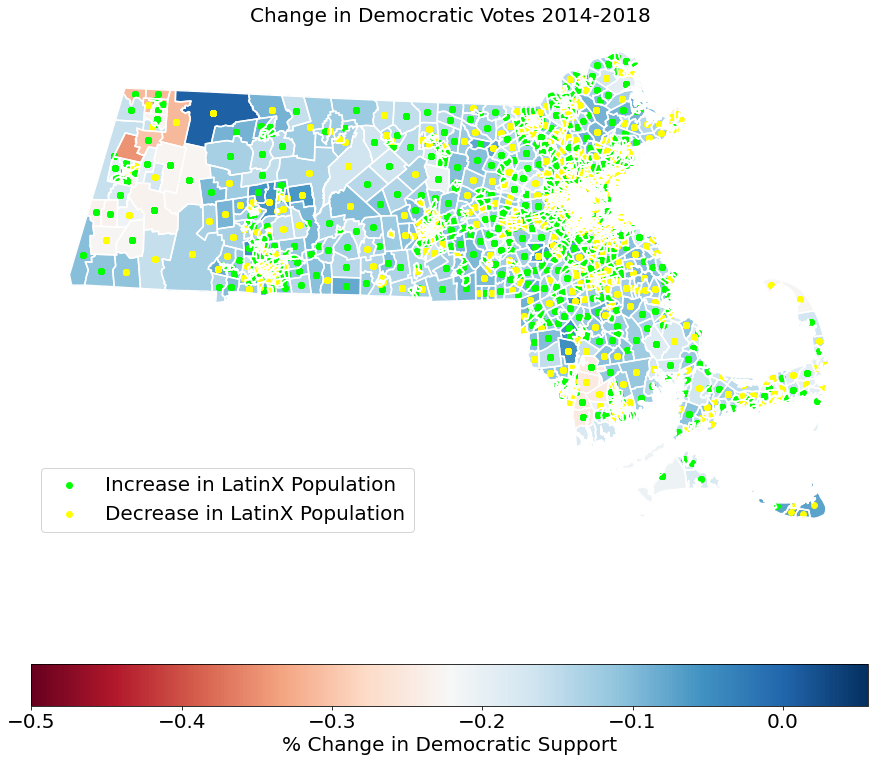

In [63]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize = (15,15))
ax.set_aspect('equal')
plt.axis('off')
ax = MA_t.boundary.plot(ax = ax, color = 'white')
plt.title('Change in Democratic Votes 2014-2018', fontsize = 20)
FinalData.plot(column='% Point Change in Democratic Votes',cmap = 'RdBu',ax=ax,legend=True,legend_kwds={'label': "% Change in Democratic Support", 'orientation': "horizontal"})
LTpos.centroid.plot(ax =ax, color = 'lime', marker = 'o', markersize =35, label = 'Increase in LatinX Population')
LTneg.centroid.plot(ax = ax, color = 'yellow', marker = 'o', markersize = 35, label = 'Decrease in LatinX Population')
plt.legend(loc = 'lower left',prop={'size': 20})

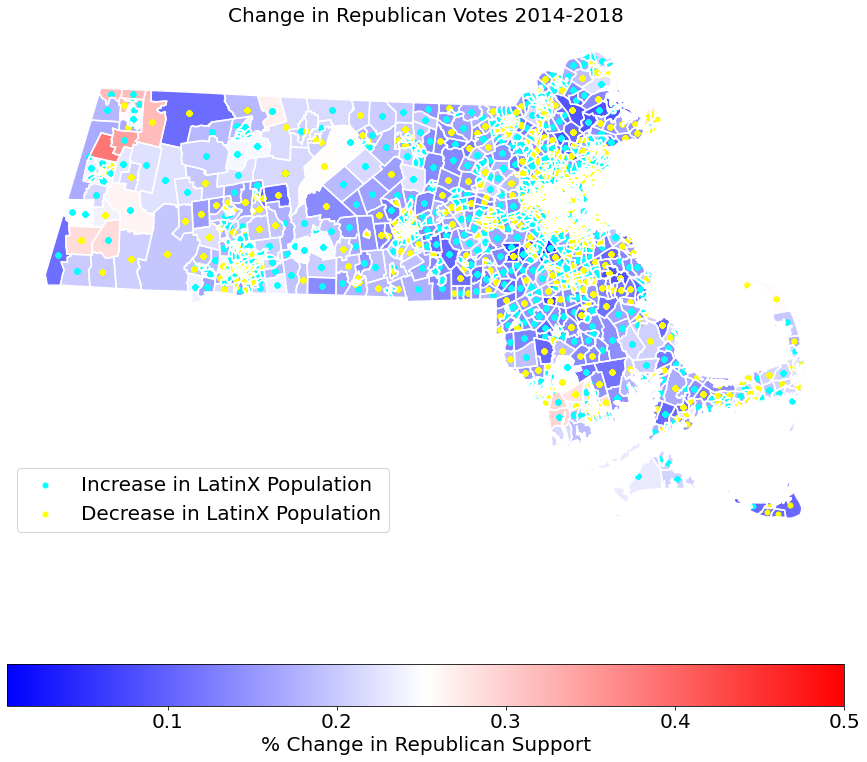

In [64]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize = (15,15))
ax.set_aspect('equal')
plt.axis('off')
ax = MA_t.boundary.plot(ax = ax, color = 'white')
plt.title('Change in Republican Votes 2014-2018', fontsize = 20)
FinalData.plot(column='% Point Change in Republican Votes',ax=ax,cmap='bwr',legend=True,legend_kwds={'label': "% Change in Republican Support", 'orientation': "horizontal"})
LTpos.centroid.plot(ax =ax, color = 'cyan', marker = 'o', markersize =25, label = 'Increase in LatinX Population')
LTneg.centroid.plot(ax = ax, color = 'yellow', marker = 'o', markersize = 25, label = 'Decrease in LatinX Population')
plt.legend(loc = 'lower left',prop={'size': 20})